# 2.5 数组的计算：广播
我们在前面的部分讨论了如何用向量化方法来减少缓慢的Python循环，另一种向量化的方法是使用python的广播功能。广播可以简单理解为用于不同大小数组的二元通用函数的一组规则。
## 2.5.1 广播的介绍
前面曾经提到过，对于同样大小的数组，二元运算符是对相应元素的逐个计算：

In [1]:
import numpy as np

a = np.array([0,1,2])
b = np.array([5,5,5])

a+b

array([5, 6, 7])

广播允许这些运算符运用于维度不同的数组，例如，可以将数组与标量相加。

In [2]:
a+5

array([5, 6, 7])

下面则提供了一个更高维的实例：

In [3]:
M = np.ones((3,3))

In [4]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

## 2.5.2 广播的规则
Numpy的广播遵循下面三条严格的规则：
<ol>
<li>如果两个数组维度不同，那么小维度数组的形状将会在最左边补1。</li>
<li>如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度为1的维度扩展以匹配另一个数组的形状。</li>
<li>如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，那么会引发异常。</li>
</ol>
下面展示了几个实例。

### 1. 广播实例1

In [6]:
M = np.ones((2,3))
a = np.arange(3)
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

### 2. 广播实例2

In [7]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 3.广播实例3

In [8]:
M = np.ones((3,2))
a = np.arange(3)
M+a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

你可能想，可以在a数组的维度右侧加上1，这样就可以完成广播操作。然而，为了严谨，**Numpy的广播操作只允许左侧加1。** 你可以自行变形数组来实现这一目的：

In [9]:
a[:,np.newaxis].shape

(3, 1)

In [10]:
M + a[:,np.newaxis].shape

array([[4., 2.],
       [4., 2.],
       [4., 2.]])

广播操作对于任意二进制通用函数都是适用的。

## 2.5.3 广播的实际应用
### 1.数组的归一化

In [11]:
X = np.random.random((10,3))
Xmean= X.mean(axis=0)
Xmean

array([0.46804618, 0.45182836, 0.59534797])

通过从X数组章减去这个均值实现归一化（典型的广播操作）

In [12]:
X_centered =  X - Xmean

In [13]:
X_centered.mean(axis=0)

array([-3.33066907e-17, -2.77555756e-17, -7.77156117e-17])

### 2. 画一个二维函数
广播一个非常有用的地方在于，它能**基于二维函数显示图像**。我们希望定义一个函数z=f(x,y),可以用广播沿着数值区间计算该函数：

In [14]:
# x和y表示0-5区间50个步长的序列
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]

z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

采用Matplotlib可视化这个二维数组

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

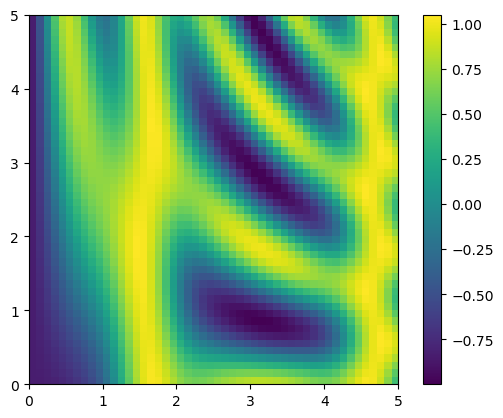

In [21]:
plt.imshow(z,origin='lower',extent=[0,5,0,5],
           cmap='viridis')
plt.colorbar();

# 2.6 比较、掩码和布尔逻辑
这一节将会介绍如何利用布尔掩码来查看和操作Numpy数组当中的值。当你想基于某些准则来抽取、修改、计数或者对一个数组中的值进行其他操作时，掩码就可以有用了。

## 2.6.1 实例：统计下雨天数

In [25]:
import numpy as np
import pandas as pd


# 利用pandas抽取雨量，放入一个Numpy数组
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254 # 1/10nm转化为inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

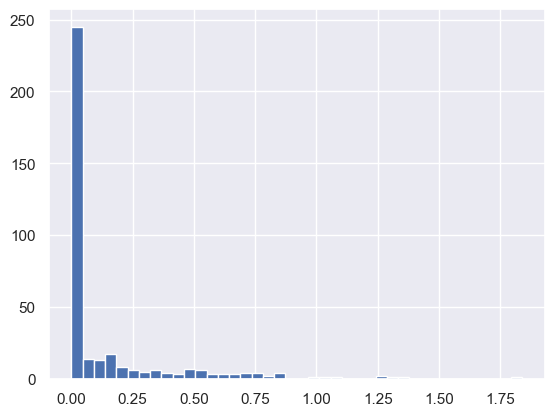

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置绘图风格

plt.hist(inches,40)

虽然这张图能够展示数据的大概样貌，但它不能回答比较精确的问题，例如有多少天降水量高于5英寸等等。这些需要对Numpy数组进行**逐元素比较**，而这就需要借助**掩码**。

## 2.6.2 和通用函数类似的比较操作
Numpy内置六种比较操作，比较操作会返回一个布尔数据类型的数组。比较运算符号如下表所示：

|运算符|对应通用函数|
|:---|:-----|
|==|np.equal|
|!=|np.not_equal|
|<|np.less|
|<=|np.less_equal|
|>|np.greater|
|>=|np.grater_equal|

下面是一些范例：

In [5]:
x=np.array([1,2,3,4,5])

In [6]:
x<3

array([ True,  True, False, False, False])

In [7]:
x>3

array([False, False, False,  True,  True])

In [8]:
x<=3

array([ True,  True,  True, False, False])

In [9]:
x>=3

array([False, False,  True,  True,  True])

In [10]:
x!=3

array([ True,  True, False,  True,  True])

In [11]:
x==3

array([False, False,  True, False, False])

利用表达式实现对两个数组的逐元素比较也是可以的

In [12]:
(2*x)==(x**2)

array([False,  True, False, False, False])

显然的，这些比较运算符都可以用于任意形状和大小的数组。

In [14]:
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 2.6.3 操作布尔数组
### 1.统计记录的个数
要统计布尔数组中True记录的个数，可以使用np.count_nonzero函数

In [16]:
np.count_nonzero(x<6)

8

另一种方式是采用np.sum，true会记作1，false会记作0。这个操作的好处是，可以利用聚合操作的特性逐行或者逐列统计。

In [17]:
np.sum(x<6)

8

In [19]:
np.sum(x<6,axis=1) # 逐行统计

array([4, 2, 2])

如果要检查所有值或者任意值是否为True，可以使用np.all或者np.any方法，同样可以利用聚合操作的特性逐行或者逐列统计。

In [20]:
# 有没有数值大于8
np.any(x>8)

True

In [21]:
# 是否所有的值都小于10 
np.all(x<10)

True

In [22]:
# 是否每一行的所有值都小于8
np.all(x<8, axis=1)

array([ True, False,  True])

### 2. 布尔运算符
我们已经知道了如何统计所有降水量小于4英寸或者大于2英寸的天数，但是如果我们想统计同时满足上述两个条件的天数呢？这可以通过**逐位逻辑运算符**来实现。Numpy通用函数重载了这些逻辑运算符，如下表所示：

|运算符|对应通用函数|计算规则|
|:---|:-----|:--------|
|&|np.bitwise_and|二元运算符，两个值同时为1输出1，否则输出0|
|\||np.bitwise_or|二元运算符，两个值同时为0输出0，否则输出1|
|^|np.bitwise_xor|二元运算符，两个值相同时输出0，否则输出1|
|~|np.bitwise_not|一元运算符，1输出0，0输出1|

通过如下复合表达式进行统计：

In [23]:
np.sum((inches>0.5)&(inches<1))

29

In [24]:
print('Number days without rain:      ',np.sum(inches==0))
print('Number days with rain:         ',np.sum(inches!=0))
print('Days with more than 0.5 inches:',np.sum(inches>0.5))
print('Rainy days with <0.2 inches    ',np.sum((inches!=0)&(inches<0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with <0.2 inches     75


## 2.6.4 将布尔数组作为掩码

In [25]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [26]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

现在为了将这些值从数组中选出，可以进行简单的索引，即**掩码**操作：

In [28]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

现在返回了一个一维数组，包含了掩码数组对应位置为True的数值。

可以对这些值做任意操作，例如根据西雅图降水数据进行一些相关统计：

In [30]:
# 为所有下雨天创建一个掩码
rainy = (inches>0)

# 构建一个包含整个夏天日期的掩码（6月21日是第172天）
summer= (np.arange(365)-172<90)&(np.arange(365)-172>0)
print(rainy)
print(summer)

[False  True  True False False  True  True  True  True  True  True  True
 False False False False False False False False False  True False False
 False False False  True  True False  True  True False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False  True
  True  True  True  True  True False  True  True  True False False  True
  True  True  True  True False  True False False False False False  True
  True  True  True  True False False False False  True False  True False
 False  True False False False False False False  True  True  True False
  True False  True  True  True  True False  True  True False False False
 False False  True  True  True False False  True  True  True False False
 False False False False False False False False False False  True False
  True False False False False False False False False False False False
 False False False False False False  True  True Fa

注意观察summer的掩码创建过程，展示了**逻辑操作运算符**&/|的特征：对一个对象内的内容（单个比特或者字节执行多个布尔运算），而CPython常用的**关键字**and和or则对整个对象执行单个布尔运算。Numpy主要使用的是逻辑操作运算符。

In [32]:
print('Median precip on raniy days in 2024 (inches):     ', np.median(inches[rainy]))
print('Median precip on summer days in 2024 (inches):    ', np.median(inches[summer]))
print('Maximum precip on summer days in 2024 (inches):   ', np.max(inches[summer]))
print('Median precip on non-summer rainy days (inches):  ', np.median(inches[rainy & ~summer]))


Median precip on raniy days in 2024 (inches):      0.19488188976377951
Median precip on summer days in 2024 (inches):     0.0
Maximum precip on summer days in 2024 (inches):    0.8503937007874016
Median precip on non-summer rainy days (inches):   0.20078740157480315


# 2.7 花哨的索引
在前面的小节中，我们看到了如何利用简单的索引值（如arr[0]）、切片（如arr[:5]）和布尔掩码（如arr[arr>0]）获得并修改部分数组。在这一节中，我们将介绍另一中数组索引，也被称为**花哨的索引（fancy indexing）**。花哨的索引传递的是索引数组，而不是单个标量。
## 2.7.1 探索花哨的索引
花哨的索引意味着传递一个索引数组来一次性获得多个数组元素，如下所示：

In [33]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

假如我们希望获得三个不同的元素，可以通过以下的方式实现；

In [34]:
[x[3],x[7],x[2]]

[71, 86, 14]

另一种方法是传递索引的单个列表数组来获得同样的结果：

In [36]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

利用花哨的索引，结果的形状与**索引数组**的形状一致，而不是与**被索引数组**一致。

In [38]:
ind = np.array([[3,7],
               [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

花哨的索引同样也对多维数组使用，假设我们有如下数组：

In [40]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

和标准索引的方式一样，第一个索引指的是行，第二个索引指的是列：

In [41]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]

array([ 2,  5, 11])

这里需要注意，结果的第一个值是X[0,2]，第二个值是X[1,1],第三个值是X[2,3]。在花哨的索引中，索引值的配对遵循2.5介绍过的而广播规则。因此将一个列向量和一个行向量组合在一个索引中时候，会得到一个二维的结果：

In [43]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [44]:
X[row, col[:,np.newaxis]]

array([[ 2,  6, 10],
       [ 1,  5,  9],
       [ 3,  7, 11]])

一定注意，这里返回值是广播后的索引数组的形状。

## 2.7.2 组合索引
花哨的索引与其他的索引方案相结合可以形成更强大的索引操作：

In [46]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [47]:
X[2,[2,0,1]]

array([10,  8,  9])

In [48]:
X[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [49]:
mask = np.array([1,0,1,0],dtype=bool)
X[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [50]:
test = np.array([True,False],dtype=int)
test

array([1, 0])

## 2.7.3 示例：选择随机点

In [51]:
mean=[0,0]
cov = [[1,2],
      [2,5]]
X = rand.multivariate_normal(mean,cov,100)
X

array([[-0.644508  , -0.46220608],
       [ 0.7376352 ,  1.21236921],
       [ 0.88151763,  1.12795177],
       [ 2.04998983,  5.97778598],
       [-0.1711348 , -2.06258746],
       [ 0.67956979,  0.83705124],
       [ 1.46860232,  1.22961093],
       [ 0.35282131,  1.49875397],
       [-2.51552505, -5.64629995],
       [ 0.0843329 , -0.3543059 ],
       [ 0.19199272,  1.48901291],
       [-0.02566217, -0.74987887],
       [ 1.00569227,  2.25287315],
       [ 0.49514263,  1.18939673],
       [ 0.0629872 ,  0.57349278],
       [ 0.75093031,  2.99487004],
       [-3.0236127 , -6.00766046],
       [-0.53943081, -0.3478899 ],
       [ 1.53817376,  1.99973464],
       [-0.50886808, -1.81099656],
       [ 1.58115602,  2.86410319],
       [ 0.99305043,  2.54294059],
       [-0.87753796, -1.15767204],
       [-1.11518048, -1.87508012],
       [ 0.4299908 ,  0.36324254],
       [ 0.97253528,  3.53815717],
       [ 0.32124996,  0.33137032],
       [-0.74618649, -2.77366681],
       [-0.88473953,

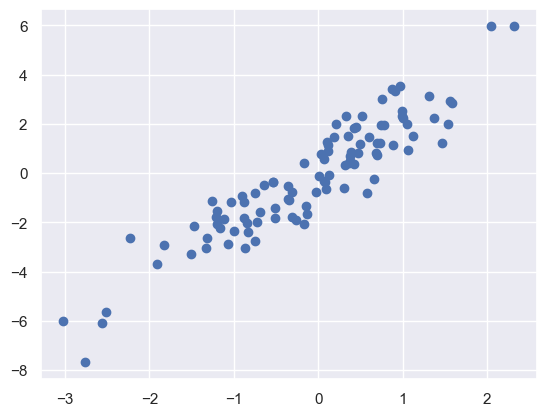

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0],X[:,1])

我们利用花哨的索引随机选取20个点————选取20个随机的、不重复的索引值，并利用索引选取到原始数组对应的值。

In [57]:
indices = np.random.choice(X.shape[0],20,replace=False)
indices

array([ 3, 88, 34,  7, 39, 87, 50, 96, 99, 80, 72, 32, 49, 94, 29,  8, 85,
       98,  1, 31])

In [58]:
selection = X[indices]
selection

array([[ 2.04998983,  5.97778598],
       [ 1.31256297,  3.13143269],
       [ 0.91181024,  3.32968944],
       [ 0.35282131,  1.49875397],
       [-0.90649669, -0.93486441],
       [-2.56215914, -6.08410838],
       [ 0.6575612 , -0.22389518],
       [-1.2567603 , -1.125898  ],
       [-1.21405259, -1.77693724],
       [ 1.12659538,  1.49627535],
       [ 0.37857234,  0.69112594],
       [-2.76337717, -7.66760648],
       [ 0.33399913,  2.32597923],
       [ 1.05185885,  1.98418223],
       [ 0.98783862,  2.30280401],
       [-2.51552505, -5.64629995],
       [-0.72009966, -1.99780959],
       [-0.99658689, -2.35038099],
       [ 0.7376352 ,  1.21236921],
       [-1.51101746, -3.2818741 ]])

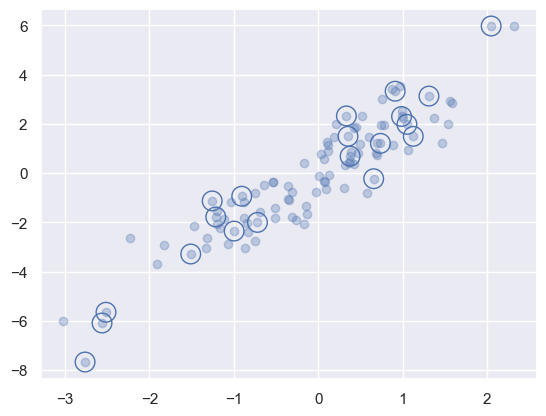

In [60]:
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='None',edgecolor='b',s=200)

## 2.7.4 用花哨的索引修改值
花哨的索引也可用于赋值上，如下所示：

In [2]:
import numpy as np
x = np.arange(10)
i = np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


任何赋值类的操作都可以实现，如下所示：

In [3]:
x[i]-=10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

然而需要注意的是，如果操作重复的索引会有一些出乎意料的结果发生，看下面这个例子：

In [4]:
x = np.zeros(10)
x[[0,0]]=[4,6]
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

4去哪里了呢？4被6覆盖了，因为X[0]被赋值了两次。

如果上面这个例子还好理解的话，下面的这个操作就不符合程序编写者的本意了：

In [5]:
i = [2,3,3,4,4,4]
x[i]+=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

即使你写成了累加的形式，x[i]并不会累加，而是在每一次调用初始条件下索引对应的值0，加上1。

要希望累加，你可以使用通用函数的at方法：

In [6]:
x = np.zeros(10)
np.add.at(x,i,1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

In [7]:
np.reduceat?

Object `np.reduceat` not found.


In [8]:
np.reduceat()?

SyntaxError: invalid syntax (3663862464.py, line 1)

## 2.7.5 示例：数据区间划分
你可以利用上述方法快速统计分布在每个区间中的数据频次，可以用ufunc.at计算：

In [11]:
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i =np.searchsorted(bins,x)

# 为每个区间加上1
np.add.at(counts,i,1)

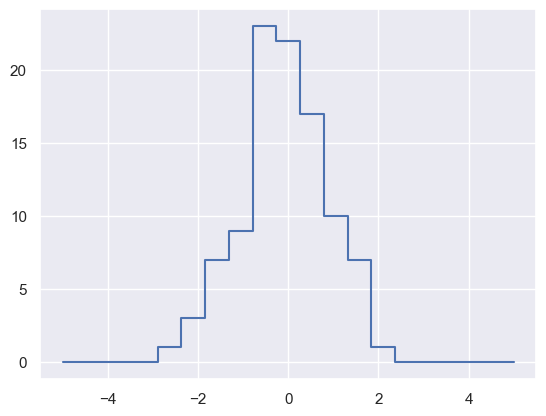

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# 画出结果
plt.step(bins,counts)

不过，plt.hist()方法也能实现上述功能：

(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x20b973124d0>])

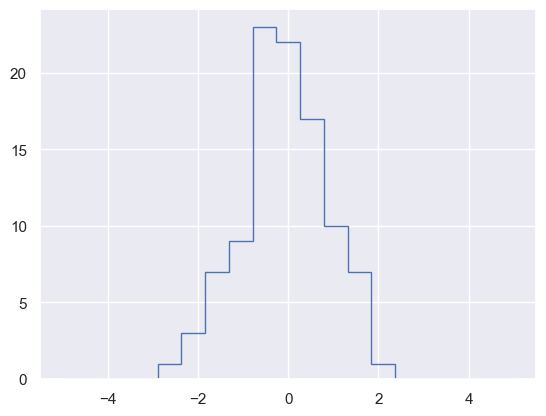

In [20]:
plt.hist(x,bins, histtype='step')

实现上述代码会调用np.histogram函数，因此代码速度在小样本下会慢一些。

# 2.8 数组的排序
排序方法包括插入排序、选择排序、归并排序、快速排序、冒泡排序等。
## 2.8.1 Numpy中的快速排序：np.sort和np.argsort
默认情况下，np.sort使用快速排序，也可以选择快速排序和堆排序。

如果想在不修改原始输入数组的基础上返回一个排好序的数组，可以使用np.sort:

In [21]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

如果希望用排好序的数组替代原始数组，可以使用数组的sort方法：

In [22]:
x.sort()
print(x)

[1 2 3 4 5]


另一个相关的函数是argsort，该函数返回的是原始数组排好序的索引值：

In [23]:
x = np.array([2,1,3,4,5])
i = np.argsort(x)
print(i)

[1 0 2 3 4]


In [24]:
x[i]

array([1, 2, 3, 4, 5])

### 沿着列或行排序

Numpy排序算法的一个有用功能是通过axis参数，沿着多维数组的行或者列进行排序。例如：

In [25]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [26]:
# 对每一列排序
np.sort(X,axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [27]:
# 对每一行排序
np.sort(X,axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

这种处理方式会打乱行或者列之间数值的关系。

## 2.8.2 部分排序：分隔
有时候我们不希望对整个数组进行排序，仅仅希望找到数组中第K小的数值。np.partition提供了这个功能。这个函数接受输入一个数组和数字K，输出的结果是一个新数组，左边是数组中从小到大排1到K的元素，右边是其他元素。

In [1]:
import numpy as np
x=np.array([7,2,3,1,6,5,4])
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

请注意，在两个分隔区间中，元素是任意排列的。

与排序列斯，也可以沿着多维数组任意的轴进行分隔：

In [3]:
X=np.array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])
np.partition(X,2,axis=1)

array([[0, 1, 1, 2, 4, 5],
       [2, 3, 4, 5, 5, 7],
       [3, 4, 6, 7, 6, 7],
       [4, 6, 7, 7, 9, 9]])

这里代表着沿行分割。和排序类似，也有一个np.argpartition函数计算的是分隔的索引。

## 2.8.3 示例：K个最近邻
以下示例展示的是如何利用argsort函数沿着多个轴快速找到集合中每个点的最近邻。

In [8]:
# 创建十个随机点放在10×2数组中
X = np.random.rand(10,2)
X

array([[0.10300811, 0.26538297],
       [0.33828103, 0.43767281],
       [0.19810721, 0.28704643],
       [0.47697327, 0.83484104],
       [0.69748609, 0.29265301],
       [0.01011021, 0.84242791],
       [0.45615974, 0.79953796],
       [0.00866604, 0.83792324],
       [0.84966875, 0.67883157],
       [0.05879076, 0.44531676]])

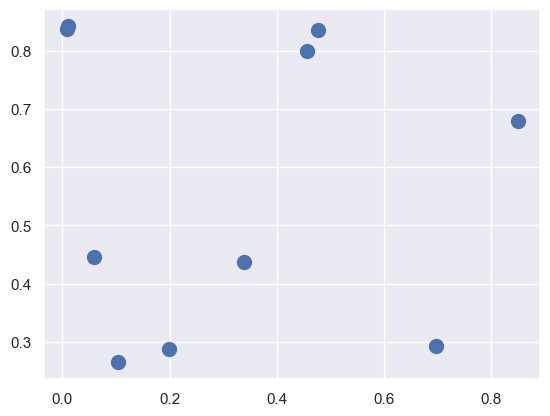

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set();
plt.scatter(X[:,0],X[:,1],s=100)

利用Numpy的广播模块来进行计算。下面是一步一步的分解过程：

In [11]:
# 建设距离矩阵，矩阵第一个维度是X轴的差值，第二个维度是y轴的差值
distance_cubic = X[:,np.newaxis,:]-X[np.newaxis,:,:]
distance_cubic.shape

(10, 10, 2)

In [12]:
# 求平方
distance_var = distance_cubic **2
distance_var.shape

(10, 10, 2)

In [16]:
# 求x平方加y平方
dis = distance_var.sum(-1)
dis

array([[0.00000000e+00, 8.50371358e-02, 9.51314343e-03, 4.64132433e-01,
        3.54147729e-01, 3.41610883e-01, 4.10037620e-01, 3.36702787e-01,
        7.28441848e-01, 3.43313415e-02],
       [8.50371358e-02, 0.00000000e+00, 4.23370076e-02, 1.76978140e-01,
        1.50059021e-01, 2.71522776e-01, 1.44841772e-01, 2.68846449e-01,
        3.19674943e-01, 7.81732392e-02],
       [9.51314343e-03, 4.23370076e-02, 0.00000000e+00, 3.77845217e-01,
        2.49410708e-01, 3.43791459e-01, 3.29238673e-01, 3.39353216e-01,
        5.78028035e-01, 4.44585678e-02],
       [4.64132433e-01, 1.76978140e-01, 3.77845217e-01, 0.00000000e+00,
        3.42593767e-01, 2.18018673e-01, 1.67951089e-03, 2.19321160e-01,
        1.63240877e-01, 3.26605775e-01],
       [3.54147729e-01, 1.50059021e-01, 2.49410708e-01, 3.42593767e-01,
        0.00000000e+00, 7.74738044e-01, 3.15170752e-01, 7.71792693e-01,
        1.72293436e-01, 4.31237946e-01],
       [3.41610883e-01, 2.71522776e-01, 3.43791459e-01, 2.18018673e-01,
   

In [18]:
sort_arg = dis.argsort(axis=1)
sort_arg

array([[0, 2, 9, 1, 7, 5, 4, 6, 3, 8],
       [1, 2, 9, 0, 6, 4, 3, 7, 5, 8],
       [2, 0, 1, 9, 4, 6, 7, 5, 3, 8],
       [3, 6, 8, 1, 5, 7, 9, 4, 2, 0],
       [4, 1, 8, 2, 6, 3, 0, 9, 7, 5],
       [5, 7, 9, 6, 3, 1, 0, 2, 8, 4],
       [6, 3, 1, 8, 5, 7, 9, 4, 2, 0],
       [7, 5, 9, 6, 3, 1, 0, 2, 8, 4],
       [8, 3, 6, 4, 1, 2, 9, 0, 5, 7],
       [9, 0, 2, 1, 7, 5, 6, 3, 4, 8]], dtype=int64)

In [20]:
# 如果你不在意所有点的排序，你可以利用np.argpartition求出最近的两个点,包括自身的话要取前三个点
closet_3_point = np.argpartition(dis,3,axis=1)
closet_3_point

array([[2, 0, 9, 1, 7, 5, 4, 6, 8, 3],
       [1, 9, 2, 0, 3, 5, 6, 7, 8, 4],
       [1, 0, 2, 9, 3, 5, 6, 7, 8, 4],
       [3, 6, 8, 1, 9, 5, 7, 4, 2, 0],
       [1, 8, 4, 2, 3, 6, 0, 7, 5, 9],
       [5, 7, 9, 6, 1, 3, 0, 2, 8, 4],
       [6, 3, 1, 8, 9, 5, 7, 4, 2, 0],
       [7, 5, 9, 6, 1, 3, 0, 2, 8, 4],
       [3, 8, 6, 4, 1, 2, 9, 7, 5, 0],
       [9, 0, 2, 1, 7, 5, 6, 3, 8, 4]], dtype=int64)

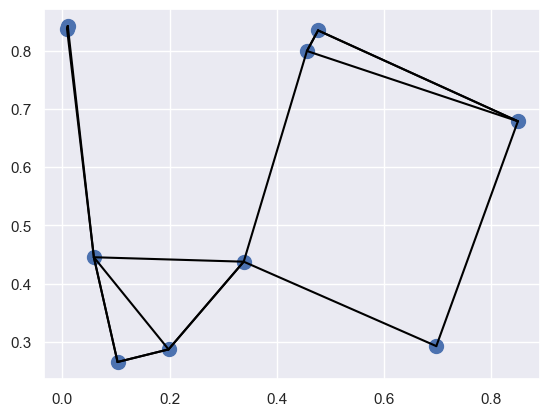

In [23]:
plt.scatter(X[:,0],X[:,1],s=100)
# 为每个点和它最近的两个点之间连上线
K = 2

for i in range(X.shape[0]):
    for j in closet_3_point[i, :K+1]:
 # 从X[i]连线到X[j]
 # 使⽤⼀些zip的魔术⽅法画线
        plt.plot(*zip(X[j], X[i]), color='black')

# 2.9 格式化数据：Numpy里的格式化数组

虽然我们的数据很多情况下都能表⽰成同种类的数组，但是某些情况下，这是不适⽤的。本⼩节展⽰了如何使⽤NumPy的结构化数组和记
录数组，它们能够提供对于复合的，不同种类的数组的有效存储⽅式。本⼩节的内容，包括场景和操作，通常都会在Pandas的
Dataframe 中使⽤，之后会在第三章中讨论。

考虑⼀下，我们有⼀些关于⼈的不同种类的数据（例如姓名、年龄和体重），现在我们想要将它们保存到Python程序中。当然它们可以被
保存到三个独⽴的数组之中：

In [24]:
import numpy as np

name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

显然这种做法有些原始。没有任何额外的信息让我们知道这三个数组是关联的；如果我们可以使⽤⼀个结构保存所有这些数据的话，会更加的⾃然。NumPy使⽤结构化数组来处理这种情况，结构化数组可以⽤来存储复合的数据类型。

回忆一下我们创建一个简单数组的方法：

In [27]:
x = np.zeros(4,dtype=int)
x

array([0, 0, 0, 0])

我们也可以使用类似的方式创建一个复合数据数组，只要指定相应的dtype类的数据就行。

In [28]:
# 使用复合的dtype参数来创建结构化数组
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                         'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


这⾥的 U10 代表着“Unicode编码的字符串，最⼤⻓度10”， i4 代表着“4字节（32⽐特）整数”， f8 代表着“8字节（64⽐特）浮点数”。本节后⾯我们会介绍其他的类型选项。

现在我们已经创建了⼀个空的结构化数组，我们可以使⽤上⾯的数据列表将数据填充到数组中：

In [30]:
data['name'] = name
data['age'] = age
data['weight'] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


使用结构化数组之后，你可以直接采用字段的名称而不是数字来访问元素了。

In [31]:
# 获取所有的名字
data['name']

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [32]:
# 获得第一行
data[0]

('Alice', 25, 55.)

In [34]:
# 获得最后一行的名字
data['name'][-1]

'Doug'

In [36]:
# 反过来也是对的
data[-1]['name']

'Doug'

使用布尔掩码，我们可以写出复杂但易懂的筛选条件，如下所示：

In [37]:
# 获得所有年龄⼩于30的⼈的姓名
data[data['age'] < 30]['name']

array(['Alice', 'Doug'], dtype='<U10')

请注意，如果你想要完成的⼯作⽐上⾯的需求还要复杂的话，你应该考虑使⽤Pandas包，下⼀章的主要内容。我们将会看到，Pandas提
供了 Dataframe 对象，它是⼀个在NumPy数组的基础上构建的结构，提供了很多有⽤的数据操作功能，包括上⾯结构化数组的功能。

## 2.9.1 创建结构化数组